In [71]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'

In [72]:
df = pd.read_excel('数据源\CCSS_sample.xlsx',sheet_name=0)
df.head()
df.describe()
df.groupby('s0').count()
df.groupby(by=['s0','s2'])['id'].count()

s0  s2
上海  女     166
    男     221
北京  女     190
    男     188
广州  女     154
    男     228
Name: id, dtype: int64

基于statsmodels的实现方式

In [73]:
from statsmodels.stats import weightstats as ws

des = ws.DescrStatsW(df[['index1','index1a','index1b']])
# 计数
des.nobs

1147.0

In [74]:
# 分位数
des.quantile([.25,.5,.75])
# 
des.mean
des.var

d:\Anaconda\Lib\site-packages\statsmodels\stats\weightstats.py:308: FutureWarning: The provided callable <function sum at 0x000001FD2499F2E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)
d:\Anaconda\Lib\site-packages\statsmodels\stats\weightstats.py:308: FutureWarning: The provided callable <function sum at 0x000001FD2499F2E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)
d:\Anaconda\Lib\site-packages\statsmodels\stats\weightstats.py:308: FutureWarning: The provided callable <function sum at 0x000001FD2499F2E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the s

array([440.49370075, 807.74958831, 533.90452841])

单变量的频数统计

In [75]:
df['time'].value_counts()  
df['s3'].value_counts()                     # 按年龄计数
df['s3'].value_counts().sort_index()        # 按年龄计数后以年龄大小排序

s3
18     8
19    10
20    38
21    38
22    32
23    38
24    61
25    52
26    63
27    28
28    50
29    33
30    76
31    19
32    29
33    23
34    23
35    38
36    29
37    14
38    12
39     9
40    41
41     8
42     7
43    25
44    13
45    36
46    13
47    15
48    16
49    11
50    42
51     9
52     7
53    13
54    13
55    17
56    14
57    14
58    17
59    11
60    28
61    14
62     9
63     9
64    13
65     9
Name: count, dtype: int64

<Axes: ylabel='count'>

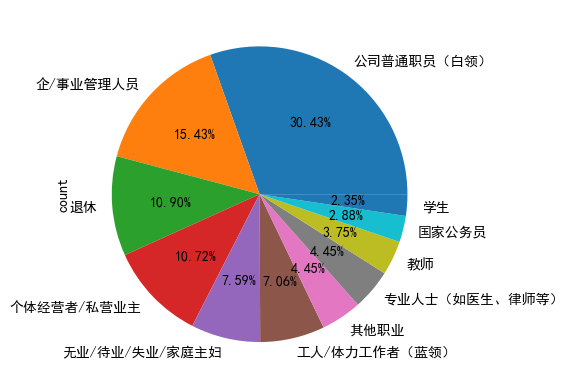

In [76]:
# df['s3'].value_counts().sort_index().plot(kind='bar')
df['s5'].value_counts().plot(kind='pie',autopct='%.2f%%')

交叉表

In [77]:
pd.crosstab(df['s2'],df['s0'])

s0,上海,北京,广州
s2,,,
女,166,190,154
男,221,188,228


In [78]:
pd.pivot_table(df,index='s0',values='s3',columns='s2',aggfunc='count')

s2,女,男
s0,,
上海,166,221
北京,190,188
广州,154,228
